# LIBRERIAS INSTALADAS

In [62]:
import pandas as pd
from pandas import DataFrame
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import math

# Importar dataset

In [63]:
net_df = pd.read_csv("../DATASETS/new_df_dies.csv", index_col="CMPLNT_FR_DT", parse_dates=True)
net_df

,Agressions,New Years,agressions_lag_1,agressions_lag_2,agressions_lag_3,agressions_lag_4,agressions_week_avg,agressions_biweek_avg,agressions_1_month_avg,agressions_2_month_avg,...,"cos(2,freq=M)","sin(1,freq=W-SUN)","cos(1,freq=W-SUN)","sin(2,freq=W-SUN)","cos(2,freq=W-SUN)","sin(3,freq=W-SUN)","cos(3,freq=W-SUN)",Poverty,Unemployment,Bachelor_or_higher
CMPLNT_FR_DT,,,,,,,,,,,,,,,,,,,,,
2000-01-01,73.0,1,0.0,0.0,0.0,1.0,10.571429,5.285714,2.766667,1.883333,...,1.000000,-0.974928,-0.222521,0.433884,-0.900969,0.781831,0.623490,0.212,0.096,0.274
2000-01-02,0.0,0,73.0,0.0,0.0,0.0,10.571429,5.285714,2.766667,1.866667,...,0.918958,-0.781831,0.623490,-0.974928,-0.222521,-0.433884,-0.900969,0.212,0.096,0.274
2000-01-04,0.0,0,0.0,73.0,0.0,0.0,10.571429,5.285714,2.766667,1.850000,...,0.347305,0.781831,0.623490,0.974928,-0.222521,0.433884,-0.900969,0.212,0.096,0.274
2000-01-05,1.0,0,0.0,0.0,73.0,0.0,10.571429,5.357143,2.766667,1.850000,...,-0.050649,0.974928,-0.222521,-0.433884,-0.900969,-0.781831,0.623490,0.212,0.096,0.274
2000-01-07,0.0,0,1.0,0.0,0.0,73.0,10.571429,5.357143,2.766667,1.850000,...,-0.758758,-0.433884,-0.900969,0.781831,0.623490,-0.974928,-0.222521,0.212,0.096,0.274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,19.0,0,25.0,21.0,17.0,21.0,19.857143,20.428571,20.966667,20.866667,...,-0.440394,0.433884,-0.900969,-0.781831,0.623490,0.974928,-0.222521,0.192,0.078,0.321
2018-12-28,22.0,0,19.0,25.0,21.0,17.0,20.714286,20.142857,21.133333,20.950000,...,-0.050649,-0.433884,-0.900969,0.781831,0.623490,-0.974928,-0.222521,0.192,0.078,0.321
2018-12-29,25.0,0,22.0,19.0,25.0,21.0,21.428571,19.928571,21.266667,20.966667,...,0.347305,-0.974928,-0.222521,0.433884,-0.900969,0.781831,0.623490,0.192,0.078,0.321


In [64]:
net_df.index = pd.to_datetime(net_df.index)
net_df_filtrado = net_df.loc['2018-07-01':'2018-08-31']

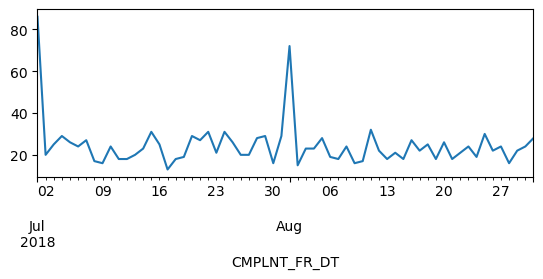

In [65]:
net_df_filtrado["Agressions"].plot(subplots=True, layout=(2,1));

# DIVIDIR DATA Y ENTRENAR MODELO

In [66]:
train_data, test_data = net_df[0:int(len(net_df)*0.8)], net_df.loc['2018-07-01':'2018-08-31']

train_arima = train_data['Agressions']
test_arima = test_data['Agressions']

history = [x for x in train_arima]
y = test_arima
predictions = list()
model = ARIMA(history, order=(1,1,0))
model_fit = model.fit()

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1112
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -4675.724
Date:                Thu, 01 Feb 2024   AIC                           9355.448
Time:                        19:02:32   BIC                           9365.474
Sample:                             0   HQIC                          9359.239
                               - 1112                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4810      0.005   -102.135      0.000      -0.490      -0.472
sigma2       264.8150      1.584    167.192      0.000     261.711     267.919
Ljung-Box (L1) (Q):                  22.70   Jarque-

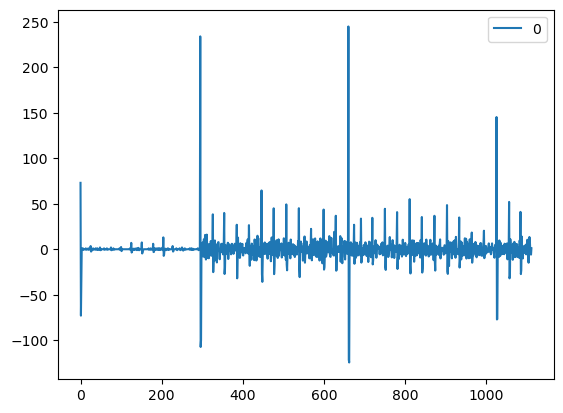

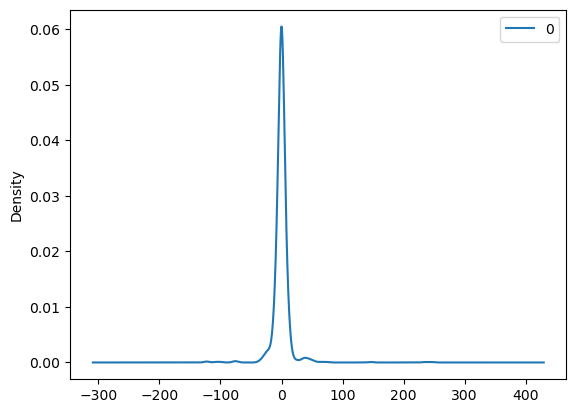

                  0
count  1.112000e+03
mean  -6.226556e-03
std    1.645359e+01
min   -1.244781e+02
25%   -3.594998e+00
50%    1.960166e-51
75%    2.604498e+00
max    2.448860e+02


In [67]:
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [68]:
yhat = model_fit.forecast()[0]
predictions.append(yhat)
history.append(y[0])

/var/folders/1d/_xylp1812vd2jg38vsf_30w00000gn/T/ipykernel_3007/151777919.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  history.append(y[0])


In [69]:
# rolling forecasts
for i in range(1, len(y)):
    # predict
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)

/var/folders/1d/_xylp1812vd2jg38vsf_30w00000gn/T/ipykernel_3007/1295931633.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = y[i]


In [70]:
# report performance
mse = mean_squared_error(y, predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(y, predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(y, predictions))
print('RMSE: '+str(rmse))

MSE: 203.45694071301548
MAE: 8.256818178103375
RMSE: 14.26383331061519


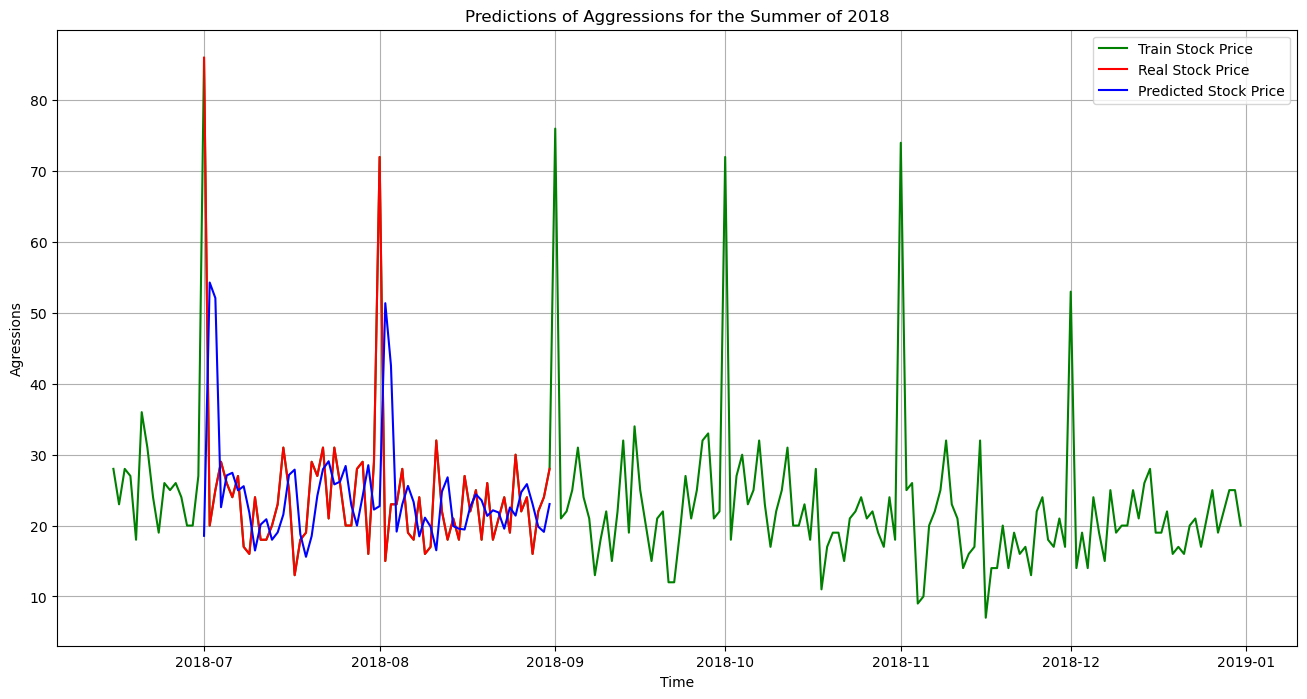

In [71]:
plt.figure(figsize=(16,8))
plt.plot(net_df.index[-200:], net_df['Agressions'].tail(200), color='green', label = 'Train Stock Price')
plt.plot(test_data.index, y, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Stock Price')
plt.title('Predictions of Aggressions for the Summer of 2018')
plt.xlabel('Time')
plt.ylabel('Agressions')
plt.legend()
plt.grid(True)
#plt.savefig('arima_model.pdf')
plt.show()

In [72]:
df_pred = pd.concat([y, pd.Series(predictions, index=y.index[-len(predictions):], name='Predictions')], axis=1)
df_pred = df_pred.iloc[:]
df_pred

,Agressions,Predictions
CMPLNT_FR_DT,,
2018-07-01,86.0,18.556999
2018-07-02,20.0,54.289859
2018-07-03,25.0,52.102016
2018-07-04,29.0,22.591242
2018-07-05,26.0,27.073325
...,...,...
2018-08-27,24.0,25.849299
2018-08-28,16.0,23.037749
2018-08-29,22.0,19.849302


In [73]:
pred_models = pd.read_csv("../DATASETS/pred_models_verano_2018.csv", index_col="CMPLNT_FR_DT", parse_dates=True)
pred_models

,Agressions,XGBoost
CMPLNT_FR_DT,,
2018-07-02,20.0,36.899230
2018-07-03,25.0,37.318207
2018-07-04,29.0,37.437160
2018-07-05,26.0,35.438885
2018-07-06,24.0,36.032814
...,...,...
2018-08-27,24.0,34.289265
2018-08-28,16.0,34.700207
2018-08-29,22.0,34.399788


In [74]:
pred_models = pred_models.merge(df_pred[['Predictions']], left_index=True, right_index=True, how='left')

In [75]:
pred_models = pred_models.rename(columns={'Predictions':'ARIMA'})

In [76]:
pred_models

,Agressions,XGBoost,ARIMA
CMPLNT_FR_DT,,,
2018-07-02,20.0,36.899230,54.289859
2018-07-03,25.0,37.318207,52.102016
2018-07-04,29.0,37.437160,22.591242
2018-07-05,26.0,35.438885,27.073325
2018-07-06,24.0,36.032814,27.445041
...,...,...,...
2018-08-27,24.0,34.289265,25.849299
2018-08-28,16.0,34.700207,23.037749
2018-08-29,22.0,34.399788,19.849302


In [77]:
pred_models_deepar = pd.read_csv("../DATASETS/pred_models_verano_2018_deepar_ny.csv", index_col="CMPLNT_FR_DT", parse_dates=True)
pred_models_deepar

,Agressions,Pred
CMPLNT_FR_DT,,
2018-07-02,20,14.25
2018-07-03,25,21.84
2018-07-04,29,14.26
2018-07-05,26,13.52
2018-07-06,24,13.42
...,...,...
2018-08-27,24,18.71
2018-08-28,16,20.34
2018-08-29,22,20.28


In [78]:
pred_models = pred_models.merge(pred_models_deepar[['Pred']], left_index=True, right_index=True, how='left')

In [79]:
pred_models = pred_models.rename(columns={'Pred':'DeepAR'})

In [80]:
pred_models

,Agressions,XGBoost,ARIMA,DeepAR
CMPLNT_FR_DT,,,,
2018-07-02,20.0,36.899230,54.289859,14.25
2018-07-03,25.0,37.318207,52.102016,21.84
2018-07-04,29.0,37.437160,22.591242,14.26
2018-07-05,26.0,35.438885,27.073325,13.52
2018-07-06,24.0,36.032814,27.445041,13.42
...,...,...,...,...
2018-08-27,24.0,34.289265,25.849299,18.71
2018-08-28,16.0,34.700207,23.037749,20.34
2018-08-29,22.0,34.399788,19.849302,20.28


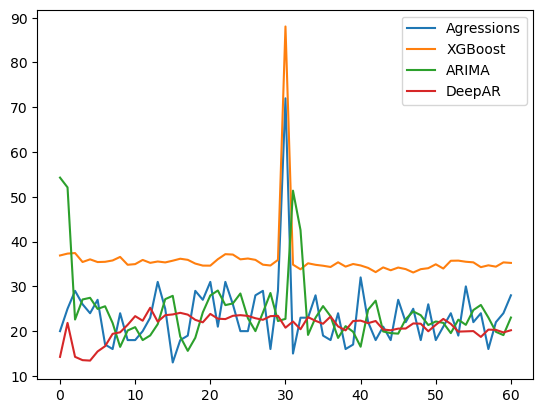

In [82]:
pred_models = pred_models.reset_index()
pred_models.plot(y=["Agressions","XGBoost","ARIMA","DeepAR"])
plt.show()